In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "f9k7m62jZ3oxqviMZTTgYceGw"
Consumer_Secret_Key = "TiNcJOhnrBCbhH7k55GDp6Qdpmlw176OMepNYgenn4ZJ4mHxF2" 
Access_Token = "1588141653402955777-9Kh8Id1kUTghxxjRlq0YS8h9hiKqRg"
Access_Token_Secret = "KkRH2p8Ilj176JP9sAbZbN7ZURDuCqHe0h3aDB9FSTiQC"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [23]:
posts = api.user_timeline(screen_name="tselenterprise", count = 1000, lang = "id", tweet_mode = "extended")

# Print the last 5 tweets
print("Show the 5 recent:\n")
i=1
for tweet in posts[:5]:
  print(str(i)+') '+tweet.full_text +'\n')
  i = i+1

Show the 5 recent:

1) Driveless vehicle kini sudah menjadi kenyataan. Waymo Robotaxi yang beroperasional di Amerika Serikat salah satunya.

AI Vehicle tersebut telah ditempatkan di berbagai lokasi untuk bisa memahami kondisi &amp; kompleksitas jalan yg berbeda. Tertarik untuk mencoba? 🤔

#MelesatPasti https://t.co/C1i140vOQo

2) Kembali digelar secara virtual, event Telkomsel Sinergi untuk Negeri yang kedua ini sedang berlangsung hingga Februari 2023.

Mari kunjungi https://t.co/JxTnzkohWN untuk merasakan keseruannya &amp; jangan lupa juga untuk mengunjungi booth kami di https://t.co/d43G1VSOLV #MelesatPasti https://t.co/dnIrEMi6ij

3) Apakah bisnismu punya strategi lain untuk bisa #MelesatPasti di momen liburan ini?

4) 1. Beri rekomendasi untuk antisipasi permasalahan konsumen.
2. Merancang customer touchpoint yang seamless.
3. Lakukan personalized experience untuk meningkatkan konversi penjualan. https://t.co/wDylpEQiPt

5) Menjelang akhir tahun, sebagian besar brand berlomba menar

In [24]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Driveless vehicle kini sudah menjadi kenyataan...
1,"Kembali digelar secara virtual, event Telkomse..."
2,Apakah bisnismu punya strategi lain untuk bisa...
3,1. Beri rekomendasi untuk antisipasi permasala...
4,"Menjelang akhir tahun, sebagian besar brand be..."


In [25]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Driveless vehicle kini sudah menjadi kenyataan...
1,"Kembali digelar secara virtual, event Telkomse..."
2,Apakah bisnismu punya strategi lain untuk bisa...
3,1. Beri rekomendasi untuk antisipasi permasala...
4,"Menjelang akhir tahun, sebagian besar brand be..."
...,...
195,"Lantas, apa saja manfaat melakukan transformas..."
196,Kemajuan teknologi terkadang dianggap bertenta...
197,"Menurut sebuah riset, konsumen dari Asia Tengg..."
198,"Resmi bekerja sama, Telkomsel melalui layanan ..."


In [26]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Driveless vehicle kini sudah menjadi kenyataan...,0.000000,0.000000
1,"Kembali digelar secara virtual, event Telkomse...",0.000000,0.000000
2,Apakah bisnismu punya strategi lain untuk bisa...,0.000000,0.000000
3,1. Beri rekomendasi untuk antisipasi permasala...,0.100000,0.100000
4,"Menjelang akhir tahun, sebagian besar brand be...",0.000000,0.000000
...,...,...,...
195,"Lantas, apa saja manfaat melakukan transformas...",0.000000,0.000000
196,Kemajuan teknologi terkadang dianggap bertenta...,0.000000,0.000000
197,"Menurut sebuah riset, konsumen dari Asia Tengg...",0.000000,0.000000
198,"Resmi bekerja sama, Telkomsel melalui layanan ...",0.642857,0.214286


<function matplotlib.pyplot.show(*args, **kw)>

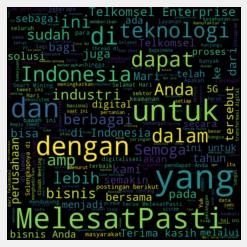

In [27]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700, height=700, random_state=10, max_font_size=100).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [28]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Driveless vehicle kini sudah menjadi kenyataan...,0.000000,0.000000,Neutral
1,"Kembali digelar secara virtual, event Telkomse...",0.000000,0.000000,Neutral
2,Apakah bisnismu punya strategi lain untuk bisa...,0.000000,0.000000,Neutral
3,1. Beri rekomendasi untuk antisipasi permasala...,0.100000,0.100000,Positive
4,"Menjelang akhir tahun, sebagian besar brand be...",0.000000,0.000000,Neutral
...,...,...,...,...
195,"Lantas, apa saja manfaat melakukan transformas...",0.000000,0.000000,Neutral
196,Kemajuan teknologi terkadang dianggap bertenta...,0.000000,0.000000,Neutral
197,"Menurut sebuah riset, konsumen dari Asia Tengg...",0.000000,0.000000,Neutral
198,"Resmi bekerja sama, Telkomsel melalui layanan ...",0.642857,0.214286,Positive


In [29]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

6) Setelah bekerja keras sepanjang tahun, libur akhir tahun harus dimanfaatkan secara optimal agar tubuh dan mental kembali segar di tahun yang baru. Berikut beberapa aktivitas yang bisa kamu lakukan:

1. Traveling di alam bebas
2. Retret kesehatan
3. Berburu diskon akhir tahun

7) Padatnya aktivitas bikin kamu sulit buat antre di GraPARI? Tenang, ada MyGraPARI yang siap melayani kebutuhanmu, seperti ganti kartu, isi pulsa, atau bayar tagihan Telkomsel Halo.

Info lebih lengkap, hubungi Call Center 188 atau email: CES.co.id 

MelesatPasti 

8) Teknologi VR seringkali dikaitkan dengan industri game. Namun, ternyata teknologi ini juga banyak dimanfaatkan dalam proses training terutama pada industri migas, manufaktur, dan pembangkit listrik. Cek postingan ini untuk tahu lebih lanjut ya! 

9) Membangun tim kerja yang solid saat remote working tidaklah mudah. Namun, ada beberapa cara untuk menjawab permasalahan tersebut. Yuk, cek postingan berikut!

Pastikan juga 

In [30]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199) 1. Beri rekomendasi untuk antisipasi permasalahan konsumen.
2. Merancang customer touchpoint yang seamless.
3. Lakukan personalized experience untuk meningkatkan konversi penjualan. 

200) Rencananya, Dishub Jakarta bersama Google Indonesia akan membuat project Green Light dengan bantuan teknologi AI yang dapat mengatur durasi lampu lalu lintas ibu kota. 

201) Maksimalkan kedua poin tersebut dengan solusi smart mining dari Telkomsel IoT kami untuk industri mining yang lebih MelesatPasti.

Cari tahu caranya di  

202) Bukan hanya sekedar konsep, ESG (Environmental, Social, Governance) juga dapat membantu perusahaan dalam memperkuat value, mengoptimalkan kinerja karyawan, dan bahkan melipat gandakan keuntungan secara jangka panjang.

Simak postingan berikut untuk lebih lengkapnya. 

203) Perkenalkan, toolkit pertama Telkomsel Enterprise untuk memperkuat pemahaman Anda tentang solusi smart manufacturing kami.

Solusi ini dapat membuka peluang bagi perusaha

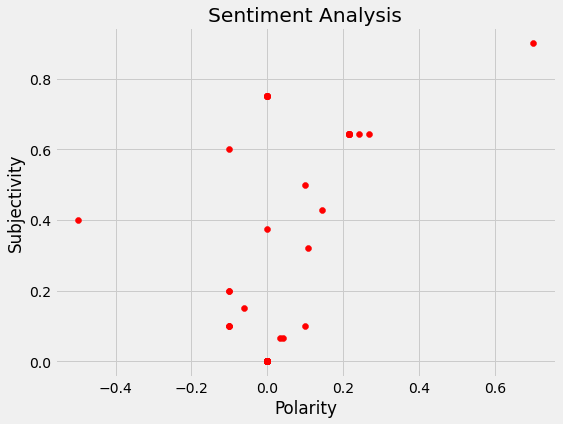

In [33]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [34]:
df['Analysis'].value_counts()

Neutral     173
Positive     19
Negative      8
Name: Analysis, dtype: int64

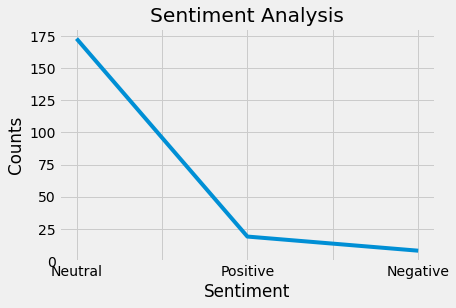

In [35]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='line')
plt.show()

In [36]:
df['Analysis'].value_counts()

Neutral     173
Positive     19
Negative      8
Name: Analysis, dtype: int64

In [37]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   Subjectivity  200 non-null    float64
 2   Polarity      200 non-null    float64
 3   Analysis      200 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.095363,0.013571
std,0.228188,0.084200
min,0.000000,-0.500000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,0.900000,0.700000


In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

Tweets          0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [40]:
df.dtypes

Tweets           object
Subjectivity    float64
Polarity        float64
Analysis         object
dtype: object

In [41]:
df.corr()

,Subjectivity,Polarity
Subjectivity,1.000000,0.496187
Polarity,0.496187,1.000000


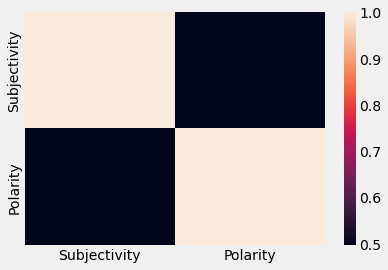

In [42]:
sns.heatmap(df.corr())